# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
data = pd.read_csv('/content/data.csv', encoding='unicode_escape')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Get basic informations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Cleaning Dataset

In [ ]:
# Convert the InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

This step aims to convert the InvoiceDate column to datetime format using the **pd.to_datetime( )** function, allowing the date data to be recognized and processed as time data during analysis.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Filling Null Descriptions Using Mode of StockCode and Dropping Remaining Missing Values

In [ ]:
non_repeated_values = data[data['Description'].isnull()]['StockCode']

for i in non_repeated_values:

  mode_description = data[data['StockCode'] == i]['Description'].mode()

  if not mode_description.empty:
    # Fill null 'Description' values with the mode value

    data.loc[(data['StockCode'] == i) & (data['Description'].isnull()), 'Description'] = mode_description[0]

data.dropna(subset=['Description'], inplace=True)

This script is used to fill null values in the Description column based on the StockCode within the dataset. If there are rows with missing Description values, the code attempts to fill them with the most frequently occurring description (mode) for the same StockCode, ensuring product data consistency. If any rows still have missing Description values after this process, those rows will be deleted to maintain the quality and completeness of the data.

## Drop null values in CustomerID column

In [ ]:
data.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Checking duplicate values

In [ ]:
data.duplicated().sum()

5225

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

# Handling the negative values in the UnitPrice dan Quantity columns

{'whiskers': [<matplotlib.lines.Line2D at 0x79842adfdfc0>,
 'caps': [<matplotlib.lines.Line2D at 0x79842adfc790>,
 'boxes': [<matplotlib.lines.Line2D at 0x79842adfd810>],
 'medians': [<matplotlib.lines.Line2D at 0x79842adfe560>],
 'fliers': [<matplotlib.lines.Line2D at 0x79842adff670>],
 'means': []}

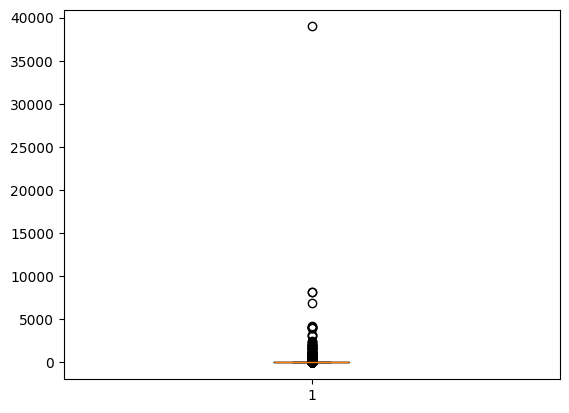

In [ ]:
plt.boxplot(data['UnitPrice'])

In [ ]:
q1 = data['UnitPrice'].quantile(.25)
q3 = data['UnitPrice'].quantile(.75)
IQR = q3 - q1
lowerbound = q1-1.5*IQR
upperbound = q3+1.5*IQR
data=data[(data['UnitPrice'] > lowerbound) & (data['UnitPrice'] < upperbound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x79846100e890>,
 'caps': [<matplotlib.lines.Line2D at 0x798429cf0a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x798429c2ac20>],
 'medians': [<matplotlib.lines.Line2D at 0x798429cf2470>],
 'fliers': [<matplotlib.lines.Line2D at 0x798429cf3a60>],
 'means': []}

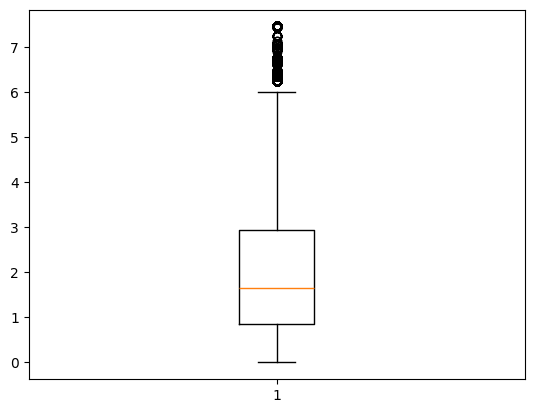

In [ ]:
plt.boxplot(data['UnitPrice'])

For the UnitPrice column, I used the IQR method because it is quite effective in handling outliers. The IQR method removes abnormal values in the dataset, whether they are too low or too high, thereby improving the quality of data analysis.

In [ ]:
data = data[(data.Quantity > 0)]

To address negative values in the Quantity column, I chose to remove data with values less than zero.

In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,358036.000000,358036,358036.000000,358036.000000
mean,14.127794,2011-07-12 01:49:53.823470592,2.127291,15301.456030
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-08 08:20:45,0.850000,13969.000000
50%,6.000000,2011-08-02 12:31:00,1.650000,15179.000000
75%,12.000000,2011-10-21 11:43:00,2.950000,16805.000000
max,80995.000000,2011-12-09 12:50:00,7.460000,18287.000000
std,190.137227,NaN,1.521814,1712.884176


# Add columns that needed

In [ ]:
# add a Revenue column
data['Revenue'] = data['UnitPrice'] * data['Quantity']

<ipython-input-20-0fc63d377bf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['UnitPrice'] * data['Quantity']


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Add additional columns to the dataset containing more detailed time-related information such as month, day, and year, which will be used for further analysis
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter']
data = data.join(pd.concat((getattr(data['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))

<ipython-input-22-e513211d139b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')


In [ ]:
data['weekofyear'] = data['InvoiceDate'].dt.isocalendar().week

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,2,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,2,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,2,335,4,48


In [ ]:
# Adding +1, Monday becomes 1, Tuesday becomes 2, and so on, with Sunday becoming 7.
data['dayofweek'] = data['dayofweek'] + 1

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


In [ ]:
# Add a new column named yearmonth by combining the year and month columns from InvoiceDate.
data.insert(loc=2, column='yearmonth', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [ ]:
data.head()

,InvoiceNo,StockCode,yearmonth,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,MonthYear,year,month,day,dayofweek,dayofyear,quarter,weekofyear
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010,12,1,3,335,4,48
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010,12,1,3,335,4,48
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010,12,1,3,335,4,48


# EDA

In [ ]:
# Consolidating number of sales made by customer for each country
sales_per_cust = data.groupby(['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', 'NumberofSales']
sales_per_cust.head()

,CustomerID,Country,NumberofSales
3993,17841.0,United Kingdom,7249
1879,14911.0,EIRE,4871
1290,14096.0,United Kingdom,4454
334,12748.0,United Kingdom,4173
1661,14606.0,United Kingdom,2439


# Periode Analysis

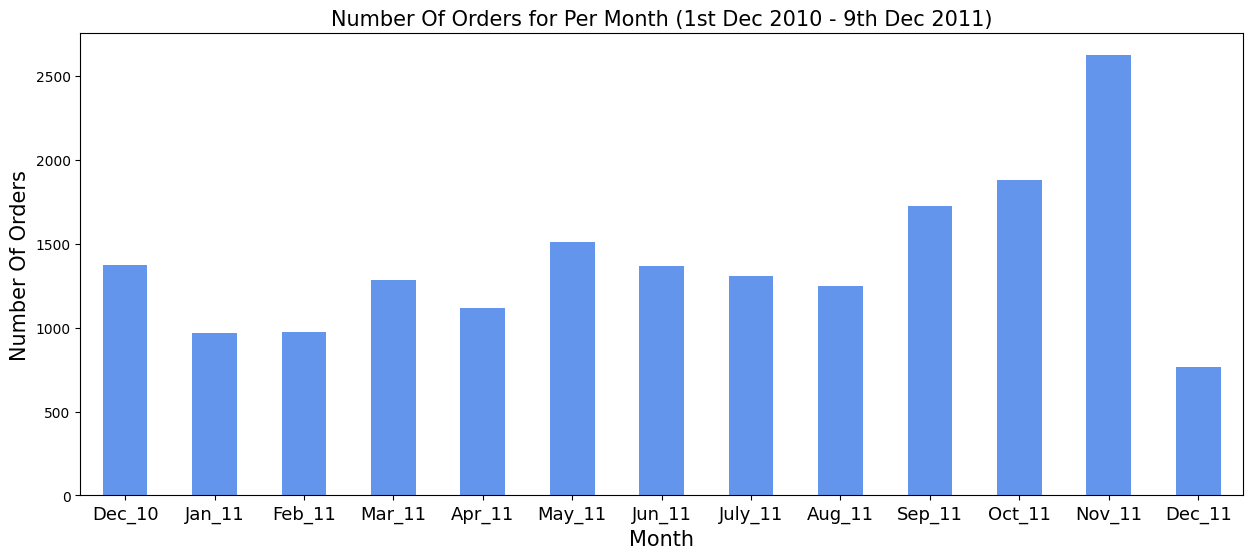

In [ ]:
# Number of order per month
ax = data.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index().plot(kind='bar',color='cornflowerblue',figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number Of Orders', fontsize=15)
ax.set_title('Number Of Orders for Per Month (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

The highest number of orders occurred in October and November, which can be attributed to seasonal factors such as specific celebrations or events. The surge in orders during November is likely driven by global events like Black Friday and Cyber Monday, known for significant discounts and widespread participation, making them international shopping phenomena. Additionally, as the year-end holidays approach, customers tend to increase their shopping activities, further contributing to the notable rise in transactions during this period.

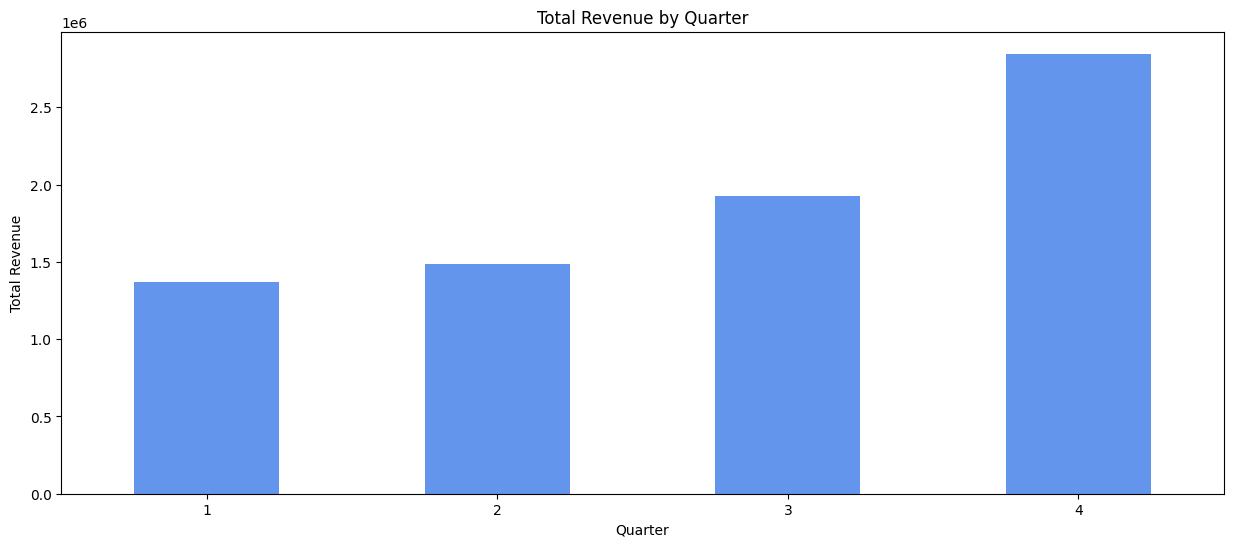

In [ ]:
# Total revenue by quarter
quarterly_revenue = data.groupby('quarter')['Revenue'].sum()

quarterly_revenue.plot(kind='bar', color='cornflowerblue', figsize=(15, 6))

plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)

plt.show()

Quarterly revenue analysis reveals that the highest total revenue is recorded in the fourth quarter, reinforcing the indication of a surge in orders during this period. This increase is likely driven by seasonal factors and major shopping events leading up to the end of the year, directly contributing to the growth in e-commerce revenue.

# Analysis per Country


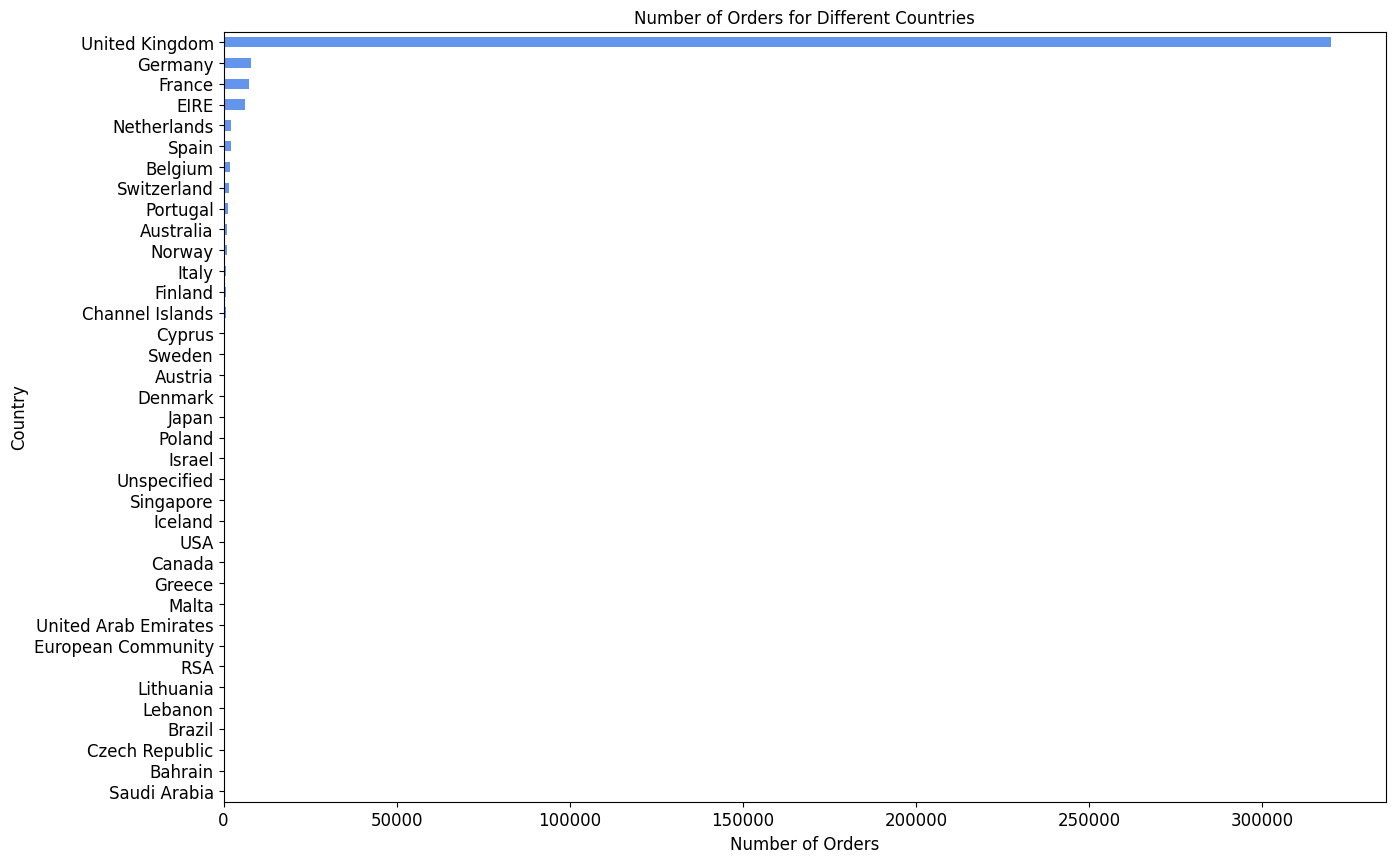

In [ ]:
group_country_orders = data.groupby('Country')['InvoiceDate'].count().sort_values()

# Plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,10))
group_country_orders.plot(kind='barh', fontsize=12, color='cornflowerblue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

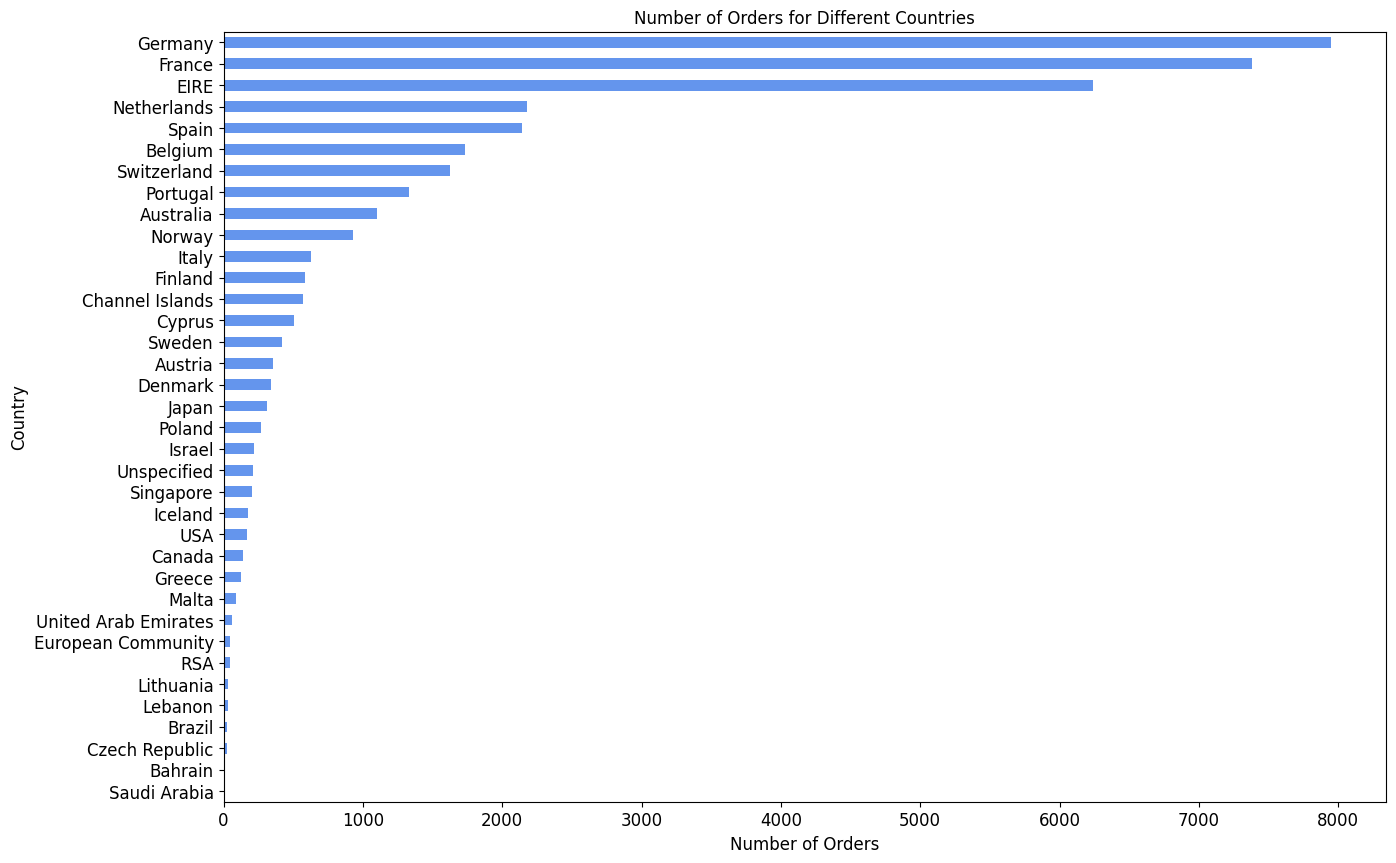

In [ ]:
# Without UK
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# Plot number of unique customers in waxh country (without UK)
plt.subplots(figsize=(15,10))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='cornflowerblue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()

Based on the graph above, the highest number of orders comes from customers in three European countries: Germany, France, and Ireland. However, upon closer analysis, other countries also show a considerable number of orders. Even some countries in Asia, such as Japan and Singapore, contribute to the total orders, although not as much as European countries. This indicates that market expansion, especially outside of Europe, remains a viable opportunity.

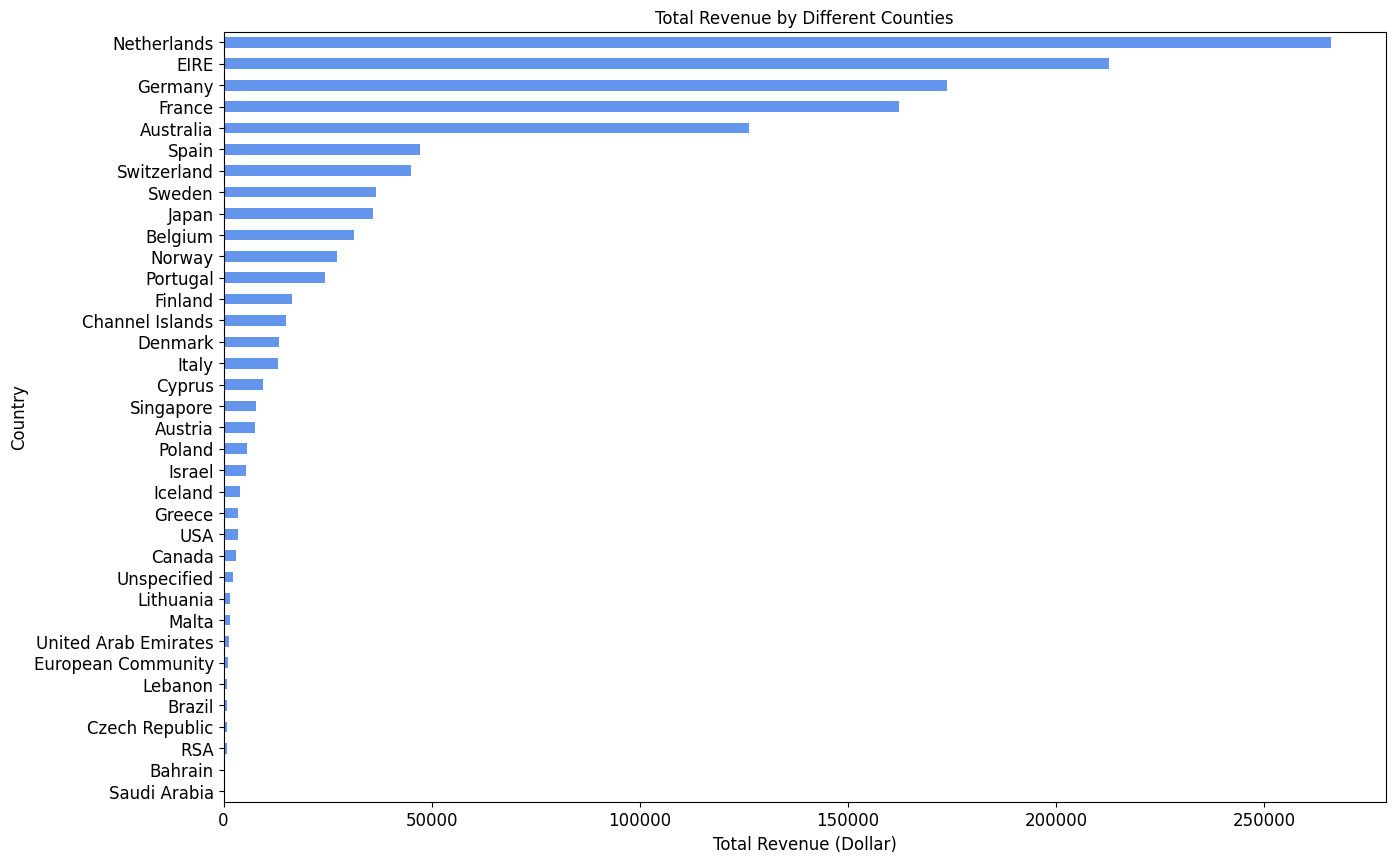

In [ ]:
# Amount spent by each country (without UK)
group_revenue_per_country = data.groupby('Country')['Revenue'].sum().sort_values()
del group_revenue_per_country['United Kingdom']

# Plot total spent by each country (Without UK)
plt.subplots(figsize=(15,10))
group_revenue_per_country.plot(kind='barh', fontsize=12, color='cornflowerblue')
plt.xlabel('Total Revenue (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Total Revenue by Different Counties', fontsize=12)
plt.show()

From a revenue perspective, the e-commerce platform records the highest revenue from customers in the Netherlands, followed by Ireland and Germany. Interestingly, Japan is also among the top 10 countries contributing the highest revenue to the e-commerce platform. This finding further strengthens the assumption that market expansion outside of Europe holds significant potential.

# RFM Anlaysis


This step is part of the Recency (R) calculation in RFM analysis. Recency measures how recently a customer made their last transaction.

In [ ]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
now = dt.datetime(2011,12,10)

In [ ]:
now

datetime.datetime(2011, 12, 10, 0, 0)

This step is part of the Recency (R) calculation in RFM analysis, where **"data['InvoiceDate'].max(  )"** is used to retrieve the latest transaction date in the dataset as the calculation basis, followed by the variable **"now = dt.datetime(2011,12,10)"** which sets the reference date to one day after the latest transaction to ensure all customers have a positive or zero Recency value, and the **"now"** value is then used to calculate the difference between the reference date and the customer's last transaction date, resulting in the Recency value that indicates how recently a customer made their last transaction.

# RFM DataFrame

In [ ]:
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda day: (now-day.max()).days, 'InvoiceNo': lambda num: len(num), 'Revenue': lambda price: price.sum()})
col_list = ['Recency', 'Frequency', 'Monetary']
rfm.columns = col_list

The script above aims to create an RFM table that consists of three key variables: Recency (R), Frequency (F), and Monetary (M). These variables provide essential insights into customer behavior:

1. Recency (R): Measures how recently a customer made their last transaction.
2. Frequency (F): Indicates how often a customer makes transactions within a given period.
3. Monetary (M): Represents the total transaction value generated by a customer over the analyzed period.

In [ ]:
# Classifying customers into five groups based on each RFM metric
rfm['R'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'],5, labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'],5, labels = [1,2,3,4,5])

# Converting RFM scores to numeric data type
rfm['R'] = rfm['R'].astype(int)
rfm['F'] = rfm['F'].astype(int)
rfm['M'] = rfm['M'].astype(int)

# Calculating the total RFM score for eEach customer
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

The script is used to calculate and classify customers into five groups based on RFM (Recency, Frequency, Monetary) metrics. This process aims to facilitate customer scoring and segmentation, enabling the company to identify high-value customers and design more targeted marketing strategies.

1. Classifying Customers into Five Groups (Quintiles) Based on Each RFM Metric.

*   Recency (R): Customers with the most recent transactions receive a score of 5, while those with older transactions receive a score of 1.
*   Frequency (F): Customers who transact most frequently receive a score of 5, while those who transact the least receive a score of 1.
*   Monetary (M): Customers with the highest total transaction value receive a score of 5, whereas those with the lowest receive a score of 1.

2. Converting RFM Scores to Numeric Data Type.

Conversion to integer is necessary to enable further calculations and analysis of the RFM Score.

3. Calculating the Total RFM Score for Each Customer.

*   The RFM Score is calculated by summing the Recency, Frequency, and Monetary scores. The higher the total RFM score, the more valuable the customer is to the company.
*   Customers with high scores are likely to be loyal, high-value customers who contribute significantly to the company’s revenue.








In [ ]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,7
12347.0,2,175,3981.15,5,5,5,15
12348.0,75,27,1437.24,2,2,4,8
12349.0,18,59,1074.15,4,4,4,12
12350.0,310,16,294.40,1,2,2,5
...,...,...,...,...,...,...,...
18280.0,277,8,137.00,1,1,1,3
18281.0,180,5,46.92,1,1,1,3
18282.0,7,9,127.05,5,1,1,7


In [ ]:
rfm['RFM_Score'].unique()

array([ 7, 15,  8, 12,  5, 11,  3,  9, 13, 10,  4, 14,  6])

This step aims to check the variation in RFM scores generated after calculating and segmenting customers. By examining score variations, we can:

1. Understand the distribution of customers based on their RFM scores.
2. Observe the spread of customers across different score ranges, which helps further analyze the balance between segments.
3. Identify whether certain scores dominate or if the score distribution is evenly spread.

By examining these scores, we can identify the lowest and highest score ranges and see how customers are distributed across different RFM segments.

In [ ]:
rfm['Customer_Segment'] = np.where(rfm['RFM_Score'] >= 12, "Top Customers", (np.where(rfm['RFM_Score'] >= 9, "High Value Customer",
                                          (np.where(rfm['RFM_Score'] >= 7, "Medium Value Customer", (np.where(rfm['RFM_Score'] >= 5, "Low Value Customer", "Lost Customer")))))))

This script is used to segment customers based on their RFM (Recency, Frequency, Monetary) scores. The objective of this segmentation is to:

1. Understand customer characteristics and priorities.
2. Simplify analysis and strategic decision-making.
3. Design more targeted and personalized marketing strategies based on customer value.

In [ ]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Customer_Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,7,Medium Value Customer
12347.0,2,175,3981.15,5,5,5,15,Top Customers
12348.0,75,27,1437.24,2,2,4,8,Medium Value Customer
12349.0,18,59,1074.15,4,4,4,12,Top Customers
12350.0,310,16,294.40,1,2,2,5,Low Value Customer
...,...,...,...,...,...,...,...,...
18280.0,277,8,137.00,1,1,1,3,Lost Customer
18281.0,180,5,46.92,1,1,1,3,Lost Customer
18282.0,7,9,127.05,5,1,1,7,Medium Value Customer


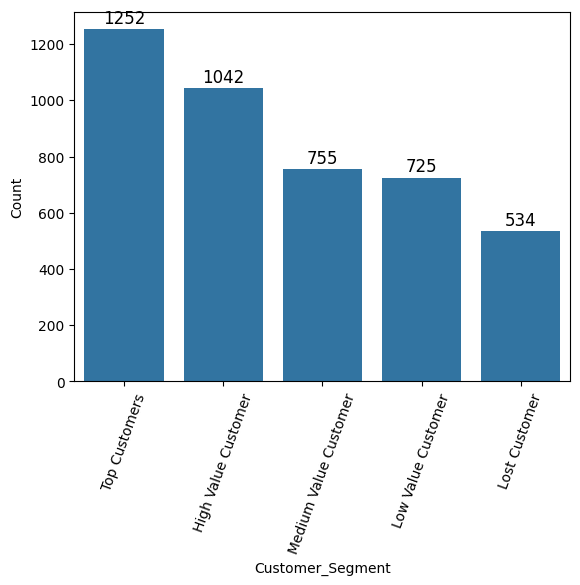

In [ ]:
segment_counts = rfm['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer_Segment', 'Count']

ax = sns.barplot(segment_counts, x = 'Customer_Segment', y = 'Count')
ax.tick_params(axis='x', rotation=70)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 8), textcoords='offset points')

After segmenting customers into five groups, it is evident that the number of customers in the "Top Customers" and "High Value Customers" segments is relatively high. However, the number of customers in the "Medium Value Customers", "Low Value Customers", and "Lost Customers" segments remains considerable. Therefore, it is essential to implement effective strategies to increase the number of customers in the "Top Customers" and "High Value Customers" segments while reducing the number of customers in the lower-value segments, such as "Medium Value Customers", "Low Value Customers", and "Lost Customers".

# Conclusion

1. Customers are predominantly from European countries, but there are also customers from outside Europe, such as Japan and Singapore. Interestingly, the revenue generated by customers from Japan is relatively high. This indicates that market expansion outside Europe is very feasible, especially in countries that contribute significantly to revenue.

2. Based on the RFM analysis, the "Top Customers" and "High Value Customers" segments have a very high number of customers. However, the "Medium Value Customers", "Low Value Customers", and "Lost Customers" segments also have a considerable number of customers.

# Advice

1. Conduct further segmentation to better understand the behavior of customers from Japan and Singapore, to strengthen the assumption that market expansion outside Europe is possible and likely to succeed.

2. Monitor the growth trends of the Japanese and Singaporean markets over recent years to assess whether there has been a significant increase in sales from these countries.

3. Develop a loyalty program to increase the frequency of return customers and transactions. This can involve offering rewards after each purchase, where points earned can be redeemed for attractive prizes such as discounts, free shipping, or even a chance to win exciting prizes.

4. Provide special discounts and attractive offers for customers in the "Medium Value Customer" and "Low Value Customer" segments. Additionally, more granular segmentation within these segments could help identify sub-segments with different characteristics and enable more targeted offers.

5. For "Lost Customers", conduct an in-depth analysis to understand the specific reasons why they stopped making purchases. This can be done through customer surveys, transaction data analysis, or even directly requesting feedback from customers to identify the root causes.